<a href="https://colab.research.google.com/github/MiguelEuripedes/embedded_AI/blob/main/Projects/first_image_classifier/mlp_classifier/test_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test

The purpose of this dataset is to correctly classify an image as containing a dog, cat, or panda. Containing only 3,000 images, the Animals dataset is meant to be another introductory dataset that we can quickly train a Multilayer Perceptron (MLP) model and obtain results that can be compared with the previously trained KNN model and the future CNN model.

Let's take the following steps:

1. Download the inference model and Encoder artifact
2. Test the inference model
3. Create an interactive table

### Step 01: Setup
Start out by installing the experiment tracking library and setting up your free W&B account:

* **pip install wandb** – Install the W&B library
* **import wandb** – Import the wandb library
* **wandb login** – Login to your W&B account so you can log all your metrics in one placeStep


In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 162 kB 47.3 MB/s 
     |████████████████████████████████| 182 kB 54.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 162 kB 58.1 MB/s 
     |████████████████████████████████| 158 kB 59.7 MB/s 
     |████████████████████████████████| 157 kB 74.8 MB/s 
     |████████████████████████████████| 157 kB 60.3 MB/s 
     |████████████████████████████████| 157 kB 38.9 MB/s 
     |████████████████████████████████| 157 kB 76.6 MB/s 
     |████████████████████████████████| 157 kB 75.1 MB/s 
     |████████████████████████████████| 157 kB 74.9 MB/s 
     |████████████████████████████████| 157 kB 77.2 MB/s 
     |████████████████████████████████| 156 kB 74.3 MB/s 


In [ ]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

**Import the packages**

In [ ]:
import logging
import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import os
import cv2
from imutils import paths
import re

Configure logging reference for a logging object

In [ ]:
logger = logging.getLogger()

Set level of logging:

In [ ]:
logger.setLevel(logging.INFO)

Create handlers:

In [ ]:
c_handler = logging.StreamHandler()
c_format = logging.Formatter(fmt="%(asctime)s %(message)s",datefmt='%d-%m-%Y %H:%M:%S')
c_handler.setFormatter(c_format)

Add handler to the logger:

In [ ]:
logger.handlers[0] = c_handler

### Step 02: Test evaluation

With the same strategy as before, we'll replace our argument parsing code with hard coded arguments and values

In [ ]:
args = {
  "project_name": "mlp_classifier",
  "test_feature_artifact": "test_x:latest",
  "test_target_artifact": "test_y:latest",
  "encoder": "target_encoder:latest",
  "inference_model": "model:latest",
  "deploy": "inference_result"
}

Since we did the training before, lets use it here. Lets start by downloading the inference model and encoder object from W&B, that was created in our previous notebook.

First lets connect properly with W&B

In [ ]:
run = wandb.init(entity="euripedes",project=args["project_name"], job_type="Test")

wandb: Currently logged in as: euripedes. Use `wandb login --relogin` to force relogin


Now lets download the data

In [ ]:
logger.info("Downloading the test data")
# test x
test_x_artifact = run.use_artifact(args["test_feature_artifact"])
test_x_path = test_x_artifact.file()

# test y
test_y_artifact = run.use_artifact(args["test_target_artifact"])
test_y_path = test_y_artifact.file()

# unpacking the artifacts
test_x = joblib.load(test_x_path)
test_y = joblib.load(test_y_path)

16-10-2022 18:37:06 Downloading the test data


Take a look at its shape

In [ ]:
logger.info("Test x: {}".format(test_x.shape))
logger.info("Test y: {}".format(test_y.shape))

16-10-2022 18:37:10 Test x: (750, 3072)
16-10-2022 18:37:10 Test y: (750,)


**Download the inference model and encoder object**

In [ ]:
logger.info("Downloading the inference model and encoder object")
# encoder
encoder_artifact = run.use_artifact(args["encoder"])
encoder_path = encoder_artifact.file()

# inference model
model_artifact = run.use_artifact(args["inference_model"])
model_path = model_artifact.file()

16-10-2022 18:37:26 Downloading the inference model and encoder object


Now we can **unpack the artifacts**

In [ ]:
# unpacking the artifacts
encoder = joblib.load(encoder_path)
model = joblib.load(model_path)

In [ ]:
encoder.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

### Step 03: Evaluating the model

In [ ]:
# encode the labels as integers
test_y = encoder.transform(test_y)

# train a mlp classifier on the raw pixel intensities
logger.info("[INFO] evaluating MLP classifier...")
predict = model.predict(test_x)

16-10-2022 18:37:37 [INFO] evaluating MLP classifier...


With it we can now look at the results

In [ ]:
print(classification_report(test_y, predict,target_names=encoder.classes_))

              precision    recall  f1-score   support

        cats       0.55      0.45      0.50       258
        dogs       0.49      0.43      0.46       248
       panda       0.64      0.83      0.72       244

    accuracy                           0.57       750
   macro avg       0.56      0.57      0.56       750
weighted avg       0.56      0.57      0.56       750



In [ ]:
# Evaluation Metrics
logger.info("Test Evaluation metrics")
fbeta = fbeta_score(test_y, predict, beta=1, zero_division=1,average='weighted')
precision = precision_score(test_y, predict, zero_division=1,average='weighted')
recall = recall_score(test_y, predict, zero_division=1,average='weighted')
acc = accuracy_score(test_y, predict)

logger.info("Test Accuracy: {}".format(acc))
logger.info("Test Precision: {}".format(precision))
logger.info("Test Recall: {}".format(recall))
logger.info("Test F1: {}".format(fbeta))

run.summary["Acc"] = acc
run.summary["Precision"] = precision
run.summary["Recall"] = recall
run.summary["F1"] = fbeta

16-10-2022 18:37:49 Test Evaluation metrics
16-10-2022 18:37:49 Test Accuracy: 0.5693333333333334
16-10-2022 18:37:49 Test Precision: 0.557969853958192
16-10-2022 18:37:49 Test Recall: 0.5693333333333334
16-10-2022 18:37:49 Test F1: 0.5575146526764094


Just to check

In [ ]:
encoder.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

Lets take a look at the Confusion Matrix

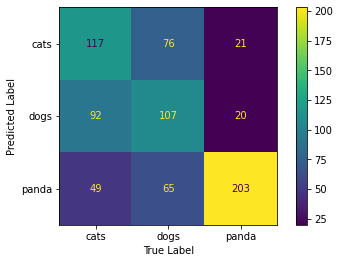

In [ ]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(7,4))
ConfusionMatrixDisplay(confusion_matrix(predict,test_y),
                       display_labels=encoder.classes_).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

Lets upload this figure to W&B

In [ ]:
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

16-10-2022 18:38:12 Uploading figures


### Step 04: Create an interactive table

In order to compare the true labls with the predict and visualize it better we can create a table and store it in W&B.

In [ ]:
# create a folder named 'test'
dirname = 'test'
os.mkdir(dirname)

# re-generate test images and put all of them in test/ folder
for i in range(test_x.shape[0]):
  img = test_x[i].reshape(32,32,3)
  cv2.imwrite(os.path.join(dirname,''.join([str(i),'.jpg'])),img)

In [ ]:
# sort image Paths by name
# 0.jpg, 1.jpg, 2.jpg, ....
imagePaths = list(paths.list_images("test"))
imagePaths = sorted(imagePaths, key=lambda x: int(re.search(r"(\d+)\.[a-z]+$", x).group(1)))

In [ ]:
# create a table with columns we want to track/compare
preview_dt = wandb.Table(columns=["test id","image", "target","predict"])

# create a new artifact to store the EDA data
inference_result = wandb.Artifact(args["deploy"], type="INFERENCE")

In [ ]:
# append all images to the artifact
for i,img in enumerate(imagePaths):
  image = cv2.imread(img)
  preview_dt.add_data(i, 
                      wandb.Image(img), 
                      encoder.inverse_transform([test_y[i]])[0], 
                      encoder.inverse_transform([predict[i]])[0])

In [ ]:
# save artifact to W&B
inference_result.add(preview_dt, "Inference_Table")
run.log_artifact(inference_result)

In [ ]:
run.finish()

Acc,0.56933
F1,0.55751
Precision,0.55797
Recall,0.56933
